In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from numpy import array
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import pandas_datareader as web
import math


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#df = quandl.get('NSE/TATAGLOBAL')
df = web.DataReader('TATAGLOBAL.BO', data_source='yahoo', start='2012-01-01', end='2020-07-13')

df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-08,436.000000,414.899994,415.000000,432.299988,355377.0,432.299988
2020-07-09,437.149994,429.350006,432.500000,433.649994,171590.0,433.649994
2020-07-10,437.750000,428.450012,430.100006,430.250000,156659.0,430.250000
2020-07-13,433.399994,422.049988,430.250000,424.399994,227488.0,424.399994
2020-07-14,426.450012,417.399994,423.000000,419.000000,124379.0,419.000000


In [3]:
df.shape

(2097, 6)

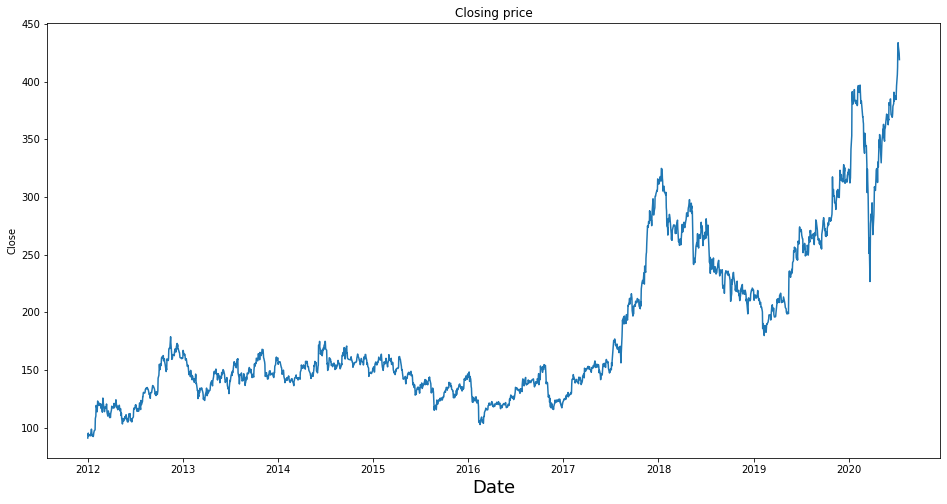

In [4]:
#visualization of closing price
plt.figure(figsize=(16,8))
plt.title('Closing price')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close')
plt.show()

In [5]:
#create new dataframe with only the "close"
data = df[["Close"]]
#convert the dataframe to numpy array
dataset= data.values
#get the number of rows to train the model on 
training_data_len = math.ceil (len(dataset) * .8 )
training_data_len

1678

In [6]:
#scalling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.01064917],
       [0.01239971],
       ...,
       [0.99008025],
       [0.9730124 ],
       [0.95725749]])

In [7]:
#creating the training dataset 
#creating the scaled training dataset
train_data = scaled_data[0:training_data_len, : ]
#split the data into x_train and y_train datasets
X_train = []
y_train= []
for i in range(60,len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(X_train)
    print(y_train)
    print()
 



[array([0.        , 0.01064917, 0.01239971, 0.00568927, 0.00831509,
       0.00641866, 0.00831509, 0.00583516, 0.0055434 , 0.00919038,
       0.02246535, 0.01750547, 0.00612691, 0.00875274, 0.00510576,
       0.00379284, 0.00714806, 0.01298322, 0.01867251, 0.02056891,
       0.04916119, 0.05324581, 0.05587163, 0.08242159, 0.07381472,
       0.06637491, 0.07892048, 0.09365426, 0.08212984, 0.08898614,
       0.08665207, 0.08694383, 0.0872356 , 0.08242159, 0.08650621,
       0.07527351, 0.08431802, 0.08329685, 0.06535376, 0.08563092,
       0.1010941 , 0.09409191, 0.08592268, 0.07352297, 0.06666666,
       0.07162654, 0.07862873, 0.07585704, 0.07906637, 0.08606857,
       0.07279357, 0.06433259, 0.05543399, 0.06374909, 0.06856309,
       0.05849744, 0.0628738 , 0.05164113, 0.0552881 , 0.0560175 ])]
[0.051932883496950355]

[array([0.        , 0.01064917, 0.01239971, 0.00568927, 0.00831509,
       0.00641866, 0.00831509, 0.00583516, 0.0055434 , 0.00919038,
       0.02246535, 0.01750547, 0.0

In [8]:
#convert the X_train and y_train to numpy arrays
X_train,y_train =np.array(X_train), np.array(y_train)

In [9]:
#reshape the data
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape


(1618, 60, 1)

In [10]:
# Building CNN Model
cnnmodel = Sequential()

# First layer
cnnmodel.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1],1)))
cnnmodel.add(MaxPooling1D(pool_size=2))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(50, activation='relu'))
cnnmodel.add(Dense(1))


In [11]:
cnnmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 59, 64)            192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 29, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1856)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                92850     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 93,093
Trainable params: 93,093
Non-trainable params: 0
_________________________________________________________________


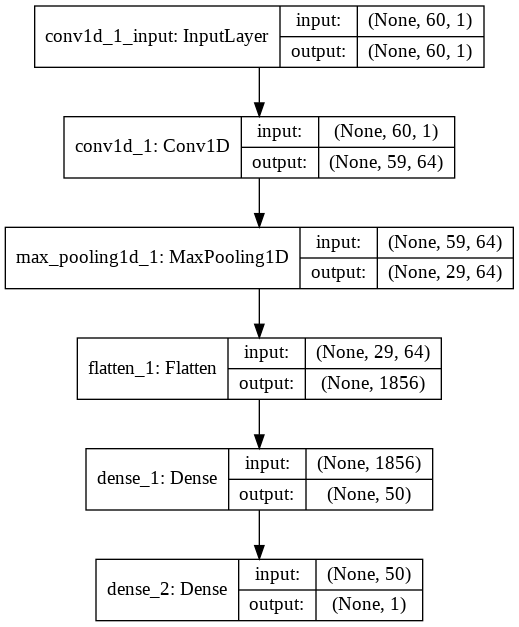

In [12]:
from keras.utils.vis_utils import plot_model

plot_model(cnnmodel, show_shapes=True, show_layer_names = True)
from IPython.display import Image
Image(filename='model.png')

In [13]:
#compail the model
cnnmodel.compile(optimizer='adam', loss="MSE")

In [14]:
cnnmodel.fit(X_train,y_train, batch_size=32, epochs=100)

Epoch 1/100
1618/1618 [==============================] - 7s 4ms/step - loss: 0.0043
Epoch 2/100
1618/1618 [==============================] - 0s 101us/step - loss: 0.0013
Epoch 3/100
1618/1618 [==============================] - 0s 90us/step - loss: 8.3985e-04
Epoch 4/100
1618/1618 [==============================] - 0s 93us/step - loss: 6.7742e-04
Epoch 5/100
1618/1618 [==============================] - 0s 88us/step - loss: 6.0129e-04
Epoch 6/100
1618/1618 [==============================] - 0s 97us/step - loss: 5.7253e-04
Epoch 7/100
1618/1618 [==============================] - 0s 91us/step - loss: 4.9166e-04
Epoch 8/100
1618/1618 [==============================] - 0s 94us/step - loss: 4.7697e-04
Epoch 9/100
1618/1618 [==============================] - 0s 90us/step - loss: 4.6091e-04
Epoch 10/100
1618/1618 [==============================] - 0s 91us/step - loss: 4.1924e-04
Epoch 11/100
1618/1618 [==============================] - 0s 88us/step - loss: 4.1809e-04
Epoch 12/100
1618/1618 [===

In [15]:
#create the testing set
#creating a new array containing scaled values from index 16-- 20--
test_data = scaled_data[training_data_len - 60 : , :]
#create the dataset X_test and y_test
X_test = []
y_test= dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i,0])
  


In [16]:
#convert the dat
X_test= np.array(X_test)

In [17]:
#reshape the data
X_test = np.reshape (X_test, (X_test.shape[0],X_test.shape[1],1))
X_test

array([[[0.42713349],
        [0.43311454],
        [0.442159  ],
        ...,
        [0.3868709 ],
        [0.37345002],
        [0.37695115]],

       [[0.43311454],
        [0.442159  ],
        [0.44142961],
        ...,
        [0.37345002],
        [0.37695115],
        [0.38336982]],

       [[0.442159  ],
        [0.44142961],
        [0.455434  ],
        ...,
        [0.37695115],
        [0.38336982],
        [0.37082422]],

       ...,

       [[0.65572574],
        [0.6773158 ],
        [0.68096278],
        ...,
        [0.93858501],
        [0.99606125],
        [1.        ]],

       [[0.6773158 ],
        [0.68096278],
        [0.68198395],
        ...,
        [0.99606125],
        [1.        ],
        [0.99008025]],

       [[0.68096278],
        [0.68198395],
        [0.64638954],
        ...,
        [1.        ],
        [0.99008025],
        [0.9730124 ]]])

In [18]:
#get the models predicted values
predictions = cnnmodel.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[219.14575],
       [217.14813],
       [220.64192],
       [219.86783],
       [219.73244],
       [224.26816],
       [217.58643],
       [216.99368],
       [221.20876],
       [220.2048 ],
       [216.83597],
       [214.55238],
       [209.89116],
       [211.67801],
       [217.35385],
       [215.07239],
       [218.2226 ],
       [222.38858],
       [222.41348],
       [215.31303],
       [215.9665 ],
       [218.06525],
       [217.04263],
       [219.09784],
       [215.96199],
       [218.42432],
       [222.45103],
       [215.72804],
       [210.47105],
       [209.08276],
       [208.81876],
       [205.54579],
       [197.82254],
       [198.38583],
       [213.10333],
       [212.25835],
       [211.28667],
       [209.47774],
       [208.44624],
       [209.4012 ],
       [210.75014],
       [216.40631],
       [219.31264],
       [218.43327],
       [219.60396],
       [220.26479],
       [219.43921],
       [219.20882],
       [213.204  ],
       [211.50813],


In [19]:
#Model Evaluation RMSE - Root Mean Square Error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.371259448067385

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


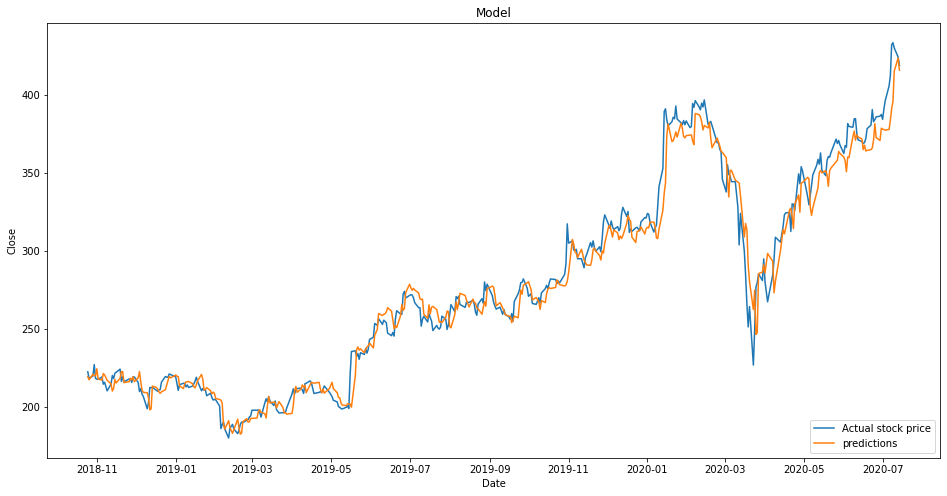

In [20]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visualization
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
# plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Actual stock price','predictions'], loc='lower right')
plt.show()

In [21]:
#show the valid and prediction
valid


,Close,predictions
Date,,
2018-10-25,222.300003,219.145752
2018-10-26,218.000000,217.148132
2018-10-29,219.600006,220.641922
2018-10-30,226.899994,219.867828
2018-10-31,218.050003,219.732437
...,...,...
2020-07-08,432.299988,391.362183
2020-07-09,433.649994,395.770569
2020-07-10,430.250000,415.454834


In [22]:
#get the quote
tata = web.DataReader('TATAGLOBAL.BO', data_source='yahoo', start='2012-01-01', end='2020-07-13')
#create new dataframe
new_df = tata.filter(['Close'])
#print(new_df.tail())
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scaling the data to values between 0 to 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data to np array
X_test = np.array(X_test)
#reshape the data
X_test= np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#get the predict value
pred_price = cnnmodel.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price) 

[[410.51062]]


In [23]:
tata1 = web.DataReader('TATAGLOBAL.BO', data_source='yahoo', start='2020-05-01', end='2020-07-14')
tata1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-04,347.149994,333.149994,343.899994,334.750000,133349.0,332.303925
2020-05-05,344.000000,327.899994,344.000000,329.500000,100655.0,327.092285
2020-05-06,340.649994,325.850006,326.000000,335.549988,94737.0,333.098053
2020-05-07,344.399994,328.000000,328.000000,341.950012,102843.0,339.451324
2020-05-08,355.500000,344.200012,348.000000,348.750000,165001.0,346.201630
2020-05-11,365.000000,349.750000,350.000000,354.950012,161397.0,352.356323
2020-05-12,363.299988,346.850006,354.100006,358.700012,155751.0,356.078918
2020-05-13,374.000000,348.549988,373.100006,355.649994,224875.0,353.051208
2020-05-14,364.299988,350.799988,351.700012,362.850006,153613.0,360.198608
